## 1- Install dependencies 
## 2 - Collect Dataset
## 3 - Write Script
## 4 - Analyse Graph

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [41]:
dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        cvsFileReader = csv.reader(csvfile) 
        next(cvsFileReader) # skip the first line
        for row in cvsFileReader:
            dates.append(int(row[0].split('-')[2]))
            prices.append(round(float(row[1]),2))
    return


        
def predict_price(dates,prices,x):
    dates = np.reshape(dates,(len(dates),1))
     
    svr_lin = SVR(kernel='linear',C=1e3)
    svr_poly = SVR(kernel='poly',C=1e3, degree = 2)
    svr_rbf =  SVR(kernel='rbf',C=1e3, gamma = 0.1)
    
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    plt.scatter(dates,prices,color='black',label='Data')
    plt.plot(dates,svr_rbf.predict(dates),color='red',label='RBF')
    plt.plot(dates,svr_lin.predict(dates),color='green',label='Linear')
    plt.plot(dates,svr_poly.predict(dates),color='blue',label='Polynomial')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    #return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0]

In [42]:
get_data('AAPL.csv')


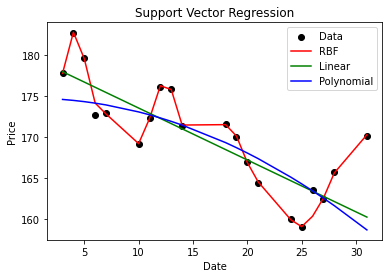

In [44]:
predict_price(dates[3:23],prices[3:23],29)

'123'